# MNIST 손글씨 인식하기

## 데이터 전처리

In [ ]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping 


import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


import os

* .shape[0] 데이터의 개수

In [ ]:
(x_train,y_class_train),(x_test,y_class_test) = mnist.load_data()

print(x_train.shape[0])
print(x_test.shape[0])
x_train

11493376/11490434 [==============================] - 0s 0us/step
60000
10000


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

####하나의 이미지 데이터 시각화

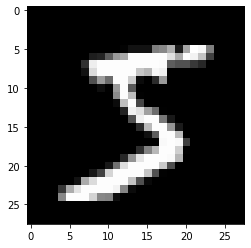

In [ ]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[0],cmap='Greys')
plt.imshow(x_train[0],cmap='gray')
plt.show()

그림의 각 좌표의 색체 강도를 숫자료 표시

In [ ]:
import sys
for x in x_train[0]:
  for i in x:
    sys.stdout.write('%d\t' % i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


#### 2차원 배열을 1차원 배열로

가로28 세로28 의 2차원 배열을 784개의 1차원 배열로

In [ ]:
x_train = x_train.reshape(x_train.shape[0],784)
x_train.shape[0]

60000

#### 정규화

색상의 밝기가 0부터 255 이므로 255로 나누면 된다

In [ ]:
x_train = x_train.astype('float64')
x_train /= 255 
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_test = x_test.reshape(x_test.shape[0],784).astype('float64')/255

클래스 값 확인

In [ ]:
y_class_train[0]

5

#### 원핫 인코딩
: 0-9 사이 값을 0,1로만 이루어진 벡터로

In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_class_train,10)
y_test = np_utils.to_categorical(y_class_test,10)

print(y_class_train)
print(y_class_test)
print(y_train)
print(y_test)


[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 모델 설계 및 학습

In [ ]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


얼리스톱이란 모델체크 추가

In [ ]:
import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1,save_best_only=True) # verbose 안해주면 에러
early_stop = EarlyStopping(monitor='val_loss',patience=10)

* validation_data=(x_test,y_test) : 검증 셋 직접 설정

In [ ]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=200,verbose=0,callbacks=[early_stop,checkpointer])


Epoch 00001: val_loss improved from inf to 0.15215, saving model to ./model/01-0.1521.hdf5

Epoch 00002: val_loss improved from 0.15215 to 0.10522, saving model to ./model/02-0.1052.hdf5

Epoch 00003: val_loss improved from 0.10522 to 0.08454, saving model to ./model/03-0.0845.hdf5

Epoch 00004: val_loss improved from 0.08454 to 0.07353, saving model to ./model/04-0.0735.hdf5

Epoch 00005: val_loss improved from 0.07353 to 0.06617, saving model to ./model/05-0.0662.hdf5

Epoch 00006: val_loss improved from 0.06617 to 0.06471, saving model to ./model/06-0.0647.hdf5

Epoch 00007: val_loss did not improve from 0.06471

Epoch 00008: val_loss improved from 0.06471 to 0.06375, saving model to ./model/08-0.0638.hdf5

Epoch 00009: val_loss improved from 0.06375 to 0.06156, saving model to ./model/09-0.0616.hdf5

Epoch 00010: val_loss did not improve from 0.06156

Epoch 00011: val_loss did not improve from 0.06156

Epoch 00012: val_loss improved from 0.06156 to 0.05906, saving model to ./model

#### 학습 결과
베스트 모델은 12번 에포크에서의 모델 

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9790
[0.0778002142906189, 0.9789999723434448]


## 결과 시각화

#### x 의 길이에 대한 테스트셋 과 훈련셋의 오차 데이터

In [ ]:
y_vloss = hist.history['val_loss'] # 검증셋 오차
y_loss = hist.history['loss'] # 학습셋 오차

x_len = np.arange(len(y_loss))
print(x_len)
print(y_loss)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[0.2994602918624878, 0.12641453742980957, 0.08500514179468155, 0.061145491898059845, 0.04612521454691887, 0.03516874089837074, 0.027756808325648308, 0.02067694254219532, 0.016627557575702667, 0.013154215179383755, 0.01037298608571291, 0.007817060686647892, 0.005575049202889204, 0.004308097995817661, 0.004177328199148178, 0.002575955120846629, 0.002247835276648402, 0.0013727586483582854, 0.001119743101298809, 0.000841609900817275, 0.021648894995450974, 0.006867537274956703]


#### 플롯으로 표현

* plt.grid() : 플롯에 십자 선 표시

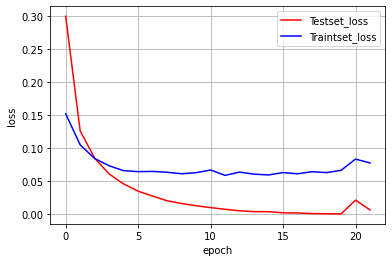

In [ ]:
plt.plot(x_len,y_loss,c='red',label='Testset_loss')
plt.plot(x_len,y_vloss,c='blue',label='Traintset_loss')

plt.legend(loc='upper right')
plt.grid() 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CNN 실행하기

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping 


import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os



#### Seed 설정

In [3]:
seed = 0
np.random.seed(0)
tf.random.set_seed(3)

#### 데이터 불러오기

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)




11493376/11490434 [==============================] - 1s 0us/step


#### 모델 설계 및 학습

In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2)) # 절반으로 줄어듬
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])

In [31]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

* 모델 검증셋 지정 방법
1. validation_split=0.3 으로 훈련데이터 안에서 검증셋 따로 생성
2. validation_data=(xtext,y-test) 로 검증셋 지정이나 불러오기

In [34]:
hist = model.fit(x_train,y_train, epochs=30,batch_size=200,callbacks=[early_stopping],validation_data=(x_test,y_test)) # 검증셋 선택하는 법 validation_data=(xtext,y-test)로 직접 지정할 수 있음

Epoch 1/30
300/300 [==============================] - 7s 20ms/step - loss: 0.5479 - accuracy: 0.8282 - val_loss: 0.0583 - val_accuracy: 0.9815
Epoch 2/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0964 - accuracy: 0.9708 - val_loss: 0.0400 - val_accuracy: 0.9871
Epoch 3/30
300/300 [==============================] - 6s 19ms/step - loss: 0.0645 - accuracy: 0.9807 - val_loss: 0.0364 - val_accuracy: 0.9883
Epoch 4/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0559 - accuracy: 0.9824 - val_loss: 0.0349 - val_accuracy: 0.9885
Epoch 5/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0301 - val_accuracy: 0.9905
Epoch 6/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0391 - accuracy: 0.9865 - val_loss: 0.0305 - val_accuracy: 0.9893
Epoch 7/30
300/300 [==============================] - 6s 20ms/step - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0278 - val_accuracy: 0.9912

22 번째 에포크에서 반복 중단 12 번 에포크에서 정확도 제일 높았음

#### 모델 정확도

In [35]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0299 - accuracy: 0.9937
[0.029853487387299538, 0.9937000274658203]


#### 학습 시각화

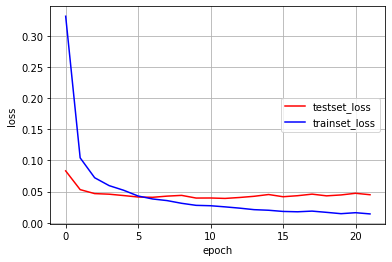

In [36]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_vloss))
plt.plot(x_len,y_vloss,c='red',label='testset_loss')
plt.plot(x_len,y_loss,c='blue',label='trainset_loss')

plt.legend(loc='center right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

5에포크 이후 과적합 시작되는 것으로 보임